# SIS Epidemic model
```Original code by Prof. Karl Scheffler```

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
import numpy as np
import seaborn as sns

In [2]:
class Simulation:

    def __init__(self, nodes, edges, prob_infect, prob_recover):
        '''
        Set simulation parameters.
        '''
        self.nodes = nodes
        self.edges = edges
        self.prob_infect = prob_infect
        self.prob_recover = prob_recover

    def reset_simulation(self):
        '''
        Initialize node states and clear out the simulation history.
        '''
        for i in self.graph.nodes:
            self.graph.nodes[i]['state'] = 1 if rd.uniform(0, 1) < 0.1 else 0
        self.history = []

    def compute_network_layout(self):
        '''
        Compute the shell layout of the simulation network.
        '''
        nodes_for_degree = {}
        for node in self.graph.nodes:
            degree = self.graph.degree[node]
            nodes_for_degree.setdefault(degree, []).append(node)
        shells = [x[1] for x in sorted(nodes_for_degree.items(), reverse=True)]
        self.layout = nx.shell_layout(self.graph, shells)

    def set_barabasi_albert(self):
        '''
        Set up the simulation to run on a Barabasi-Albert random graph.
        '''
        self.graph = nx.barabasi_albert_graph(self.nodes, self.edges // 2)
        self.compute_network_layout()
        self.reset_simulation()

    def set_watts_strogatz(self):
        '''
        Set up the simulation to run on a Watts-Strogatz random graph.
        '''
        self.graph = nx.watts_strogatz_graph(self.nodes, self.edges, 1)
        self.compute_network_layout()
        self.reset_simulation()

    def set_erdos_renyi(self):
        '''
        Set up the simulation to run on a Erdos-Renyi random graph.
        '''
        self.graph = nx.erdos_renyi_graph(self.nodes, self.edges / (self.nodes - 1))
        self.compute_network_layout()
        self.reset_simulation()

    def observe(self):
        '''
        Plot the network state, degree distribution, and infection history.
        '''
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 2)
        plt.plot(self.history)
        plt.xlabel('step')
        plt.ylabel('proportion infected')
        plt.xlim(0, 500)
        plt.ylim(0, max(self.history) * 1.05 if len(self.history) > 0 else 1)
        plt.title('Step: ' + str(len(self.history)))
        plt.subplot(1, 2, 1)
        nx.draw(
            self.graph, edgelist=[], pos=self.layout,
            node_color=[1 - self.graph.nodes[i]['state'] for i in self.graph.nodes],
            alpha=[self.graph.nodes[i]['state'] * 0.5 + 0.5 for i in self.graph.nodes],
            vmin=0, vmax=1, node_size=10)
        
    def update(self):
        '''
        Update the network state.
        '''
        new_state = {}
        for a in self.graph.nodes:
            if self.graph.nodes[a]['state'] == 0:  # If node is susceptible
                new_state[a] = 0
                for b in self.graph.neighbors(a):  # Check if neighbors are infected
                    if self.graph.nodes[b]['state'] == 1:
                        new_state[a] = 1 if rd.uniform(0, 1) < self.prob_infect else 0
                        if new_state[a] == 1:
                            # Just got infected, so we can stop checking
                            break
            else: # If node is infected
                new_state[a] = 0 if rd.uniform(0, 1) < self.prob_recover else 1
        for i in self.graph.nodes:
            self.graph.nodes[i]['state'] = new_state[i]
        self.history.append(sum(new_state.values()) / len(new_state))

In [123]:
def generate_matrix(timesteps):
    val_inf = np.linspace(.005, .1, 20)
    val_rec = np.linspace(.01, 1, 50)
    matrix_qi = []
    for infec in val_inf:
        if infec in [.025, .05, .075, .1]:
            print('Infection: {} --- In progress'.format(infec))
        for recov in val_rec:
            result = run_sim(timesteps, infec, recov)
            matrix_qi.append(result)
    matrix_qii = np.array(matrix_qi)
    return matrix_qii

def plot_heatmap(matrix):
    matrix = matrix.reshape((20, 50))
    cmap = sns.cm.rocket_r
    ax = sns.heatmap(matrix, vmin=0, vmax=1, cmap=cmap)
    ax.set_yticks(np.arange(0, 20, step=10))
    ax.set_xticks(np.arange(0, 50, step=10))
    plt.title('Simulation based on the variation of \nInfection and Recovery', 
              fontsize=18)
    plt.xlabel('Recovery', fontsize=15)
    plt.ylabel('Infection', fontsize=15)
    
def run_sim(timesteps, infec, recov):
    sim = Simulation(nodes=1000, edges=20, 
                     prob_infect=infec, prob_recover=recov)
    #sim.set_erdos_renyi()
    #sim.set_watts_strogatz()
    #sim.set_barabasi_albert()
    
    for step in range(timesteps):
        sim.update()
        if sum(sim.graph.nodes[i]['state'] 
               for i in sim.graph.nodes) == 0: break
    return sim.history[-1]

## Erdos-Renyi Network

In [6]:
matrix_er = generate_matrix(100)

Infection: 0.025 --- In progress
Infection: 0.1 --- In progress


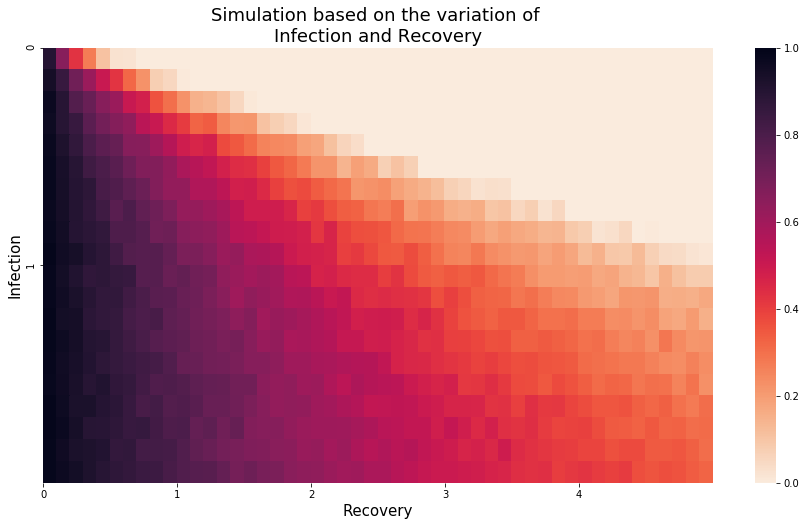

In [98]:
plt.figure(figsize=(15, 8))
plot_heatmap(matrix_er)
plt.show()

## Watts-Strogatz Network

In [100]:
matrix_ws = generate_matrix(100)

Infection: 0.025 --- In progress
Infection: 0.1 --- In progress


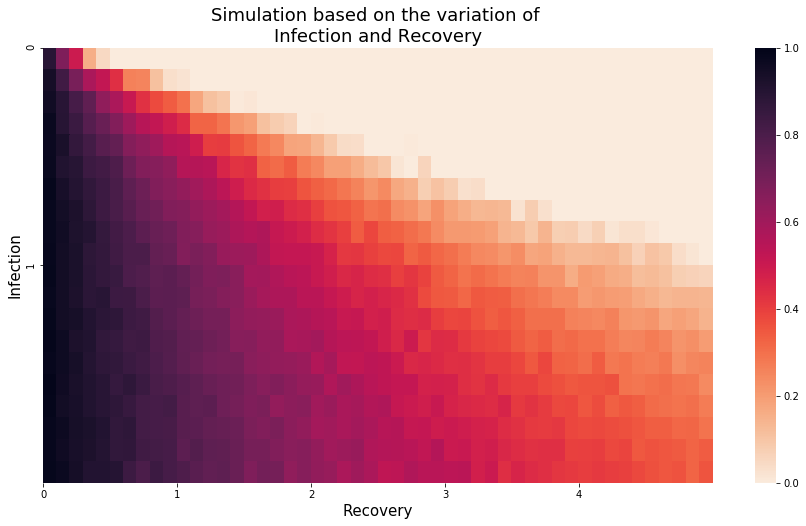

In [101]:
plt.figure(figsize=(15, 8))
plot_heatmap(matrix_ws)
plt.show()

## Barabasi-Albert Network

In [124]:
matrix_ba = generate_matrix(100)

Infection: 0.025 --- In progress
Infection: 0.1 --- In progress


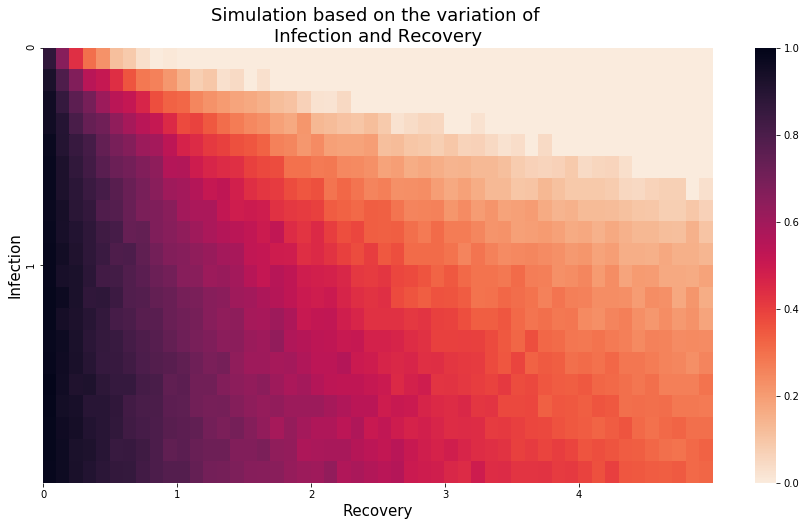

In [125]:
plt.figure(figsize=(15, 8))
plot_heatmap(matrix_ba)
plt.show()

# Simulating the results at critical values
## Erdos-Renyi Network

Nodes: 1000
Average degree: 19.92
Infection rate: 0.01
Recovery rate: 0.22


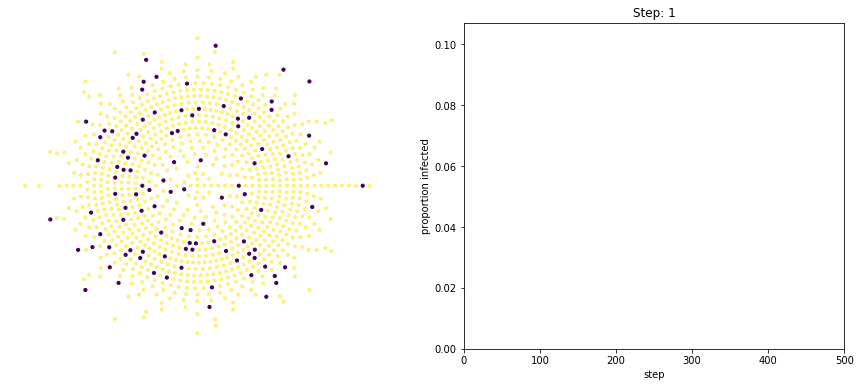

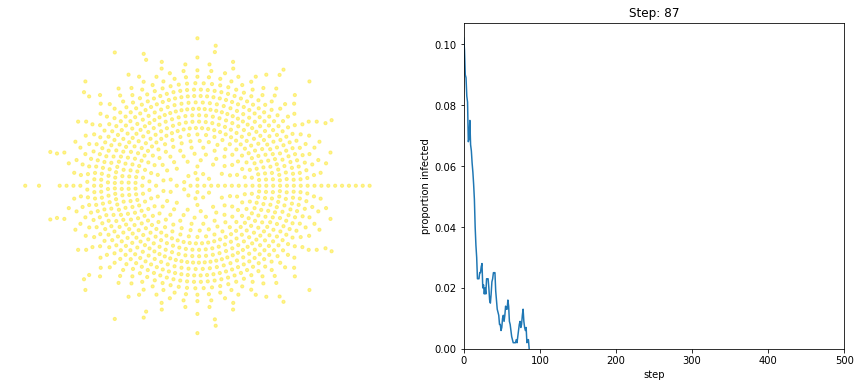

In [105]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.22)  # recovery probability

sim.set_erdos_renyi()
# sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()

Nodes: 1000
Average degree: 20.144
Infection rate: 0.1
Recovery rate: 0.5


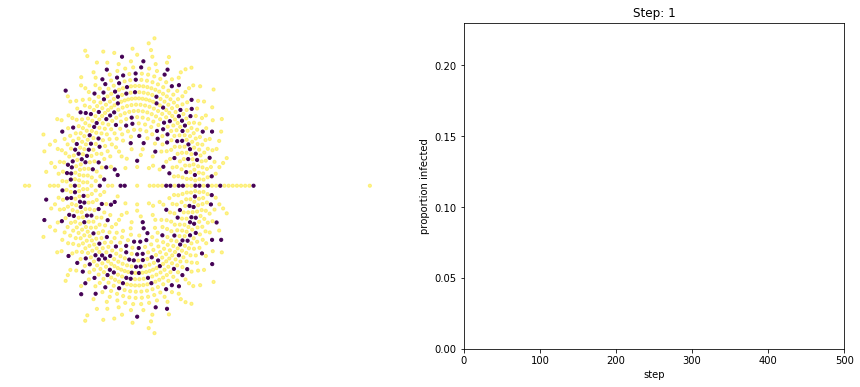

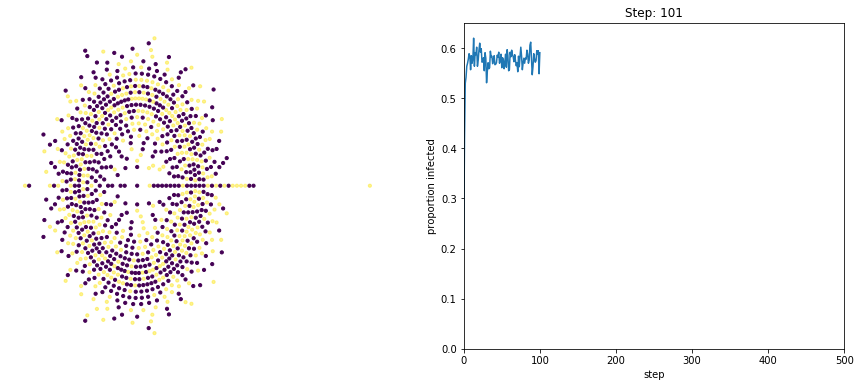

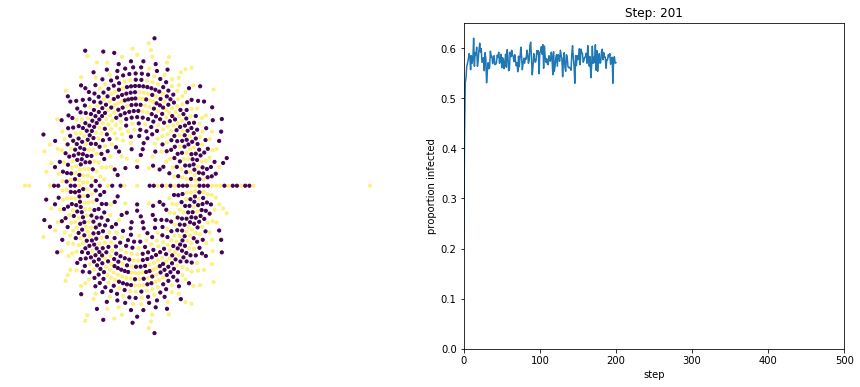

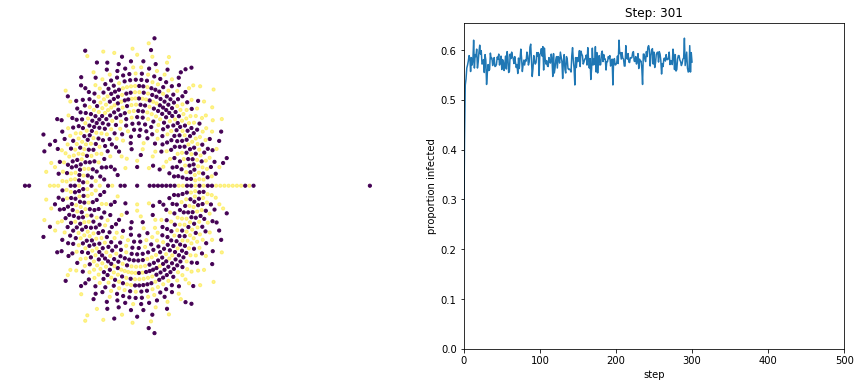

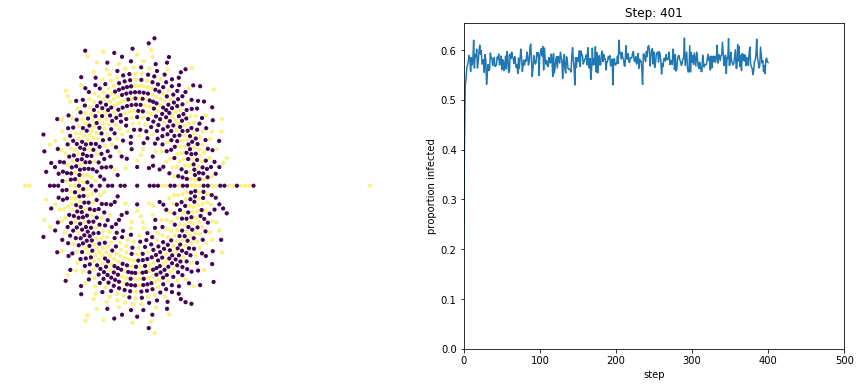

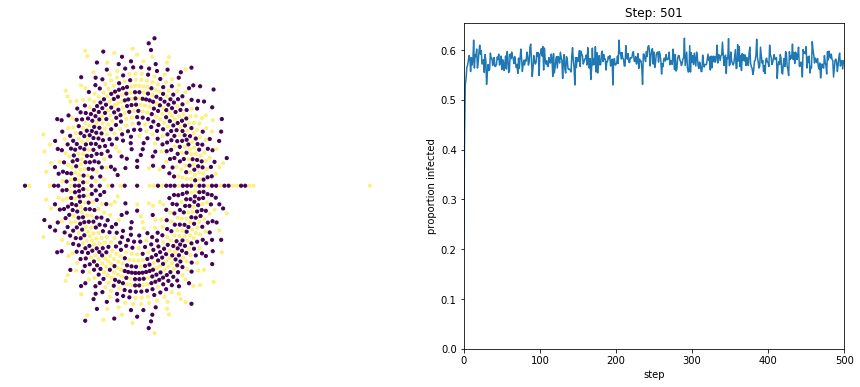

In [111]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.1,  # infection probability
    0.5)  # recovery probability

sim.set_erdos_renyi()
# sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()

## Watts-Strogatz Network

Nodes: 1000
Average degree: 20.0
Infection rate: 0.01
Recovery rate: 0.18


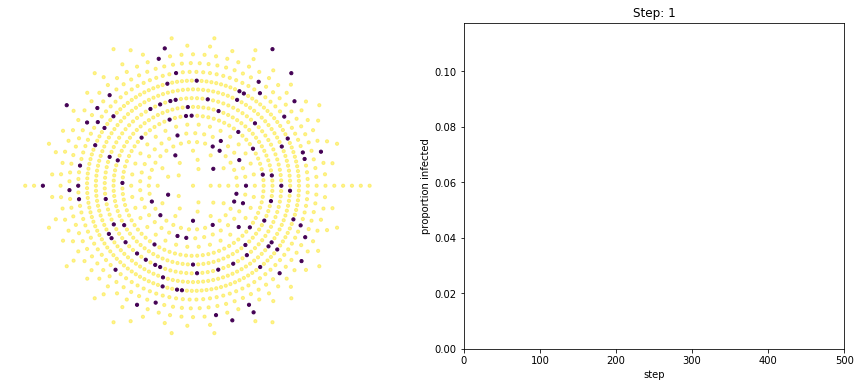

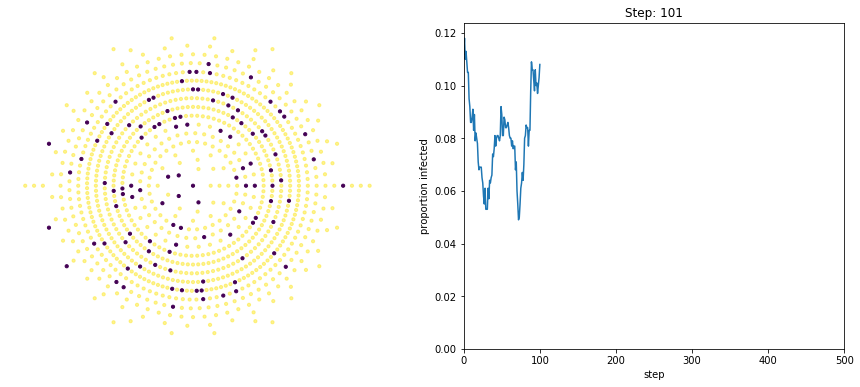

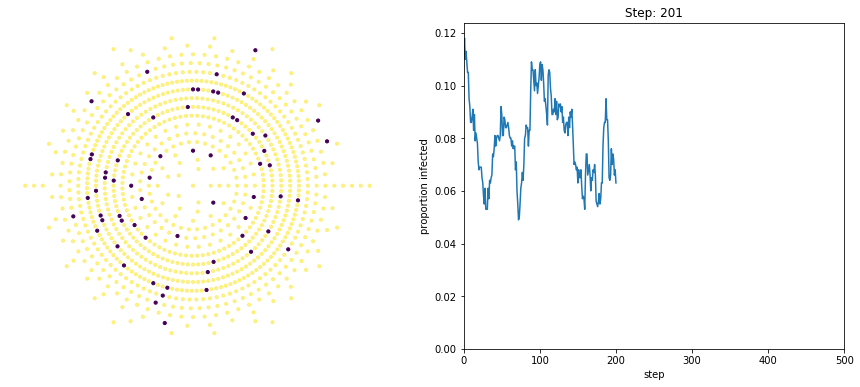

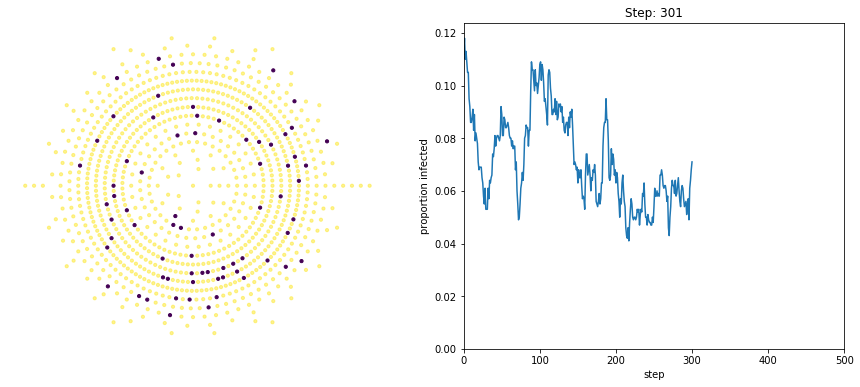

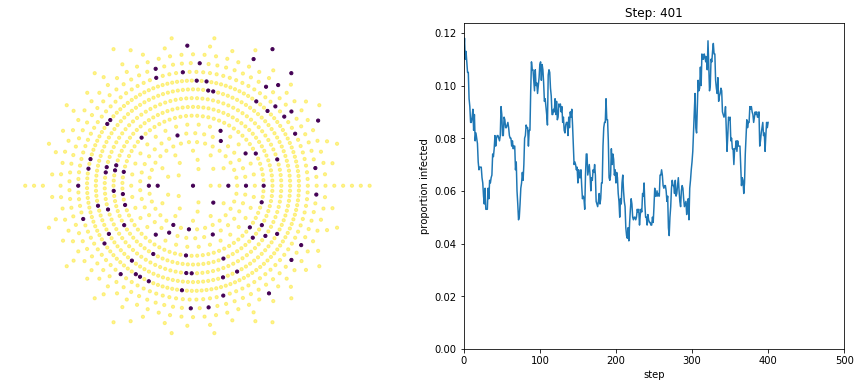

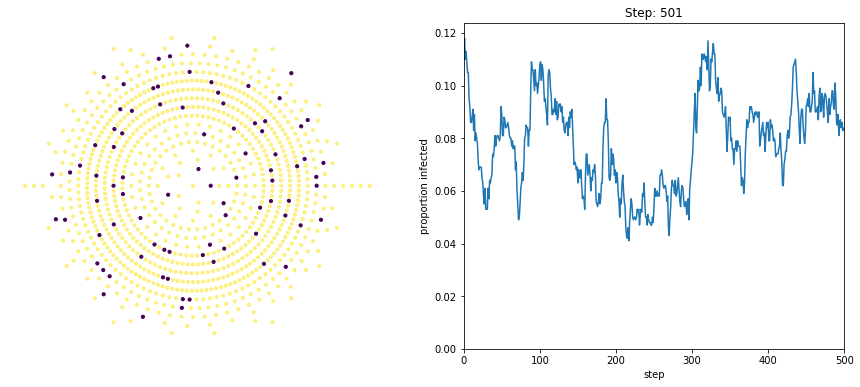

In [112]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.18)  # recovery probability

# sim.set_erdos_renyi()
sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()

Nodes: 1000
Average degree: 20.0
Infection rate: 0.01
Recovery rate: 0.22


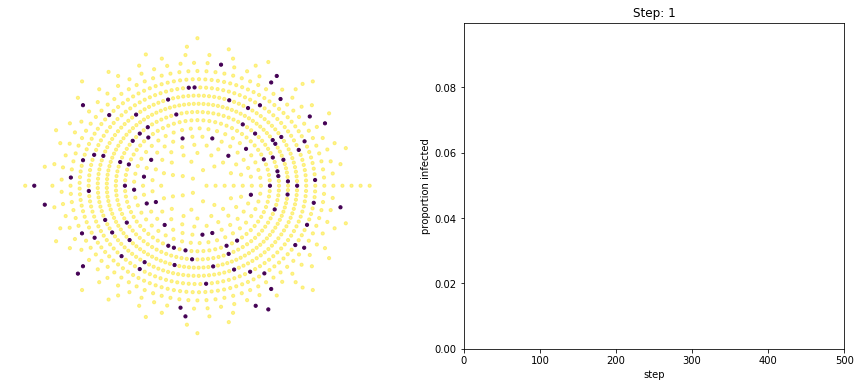

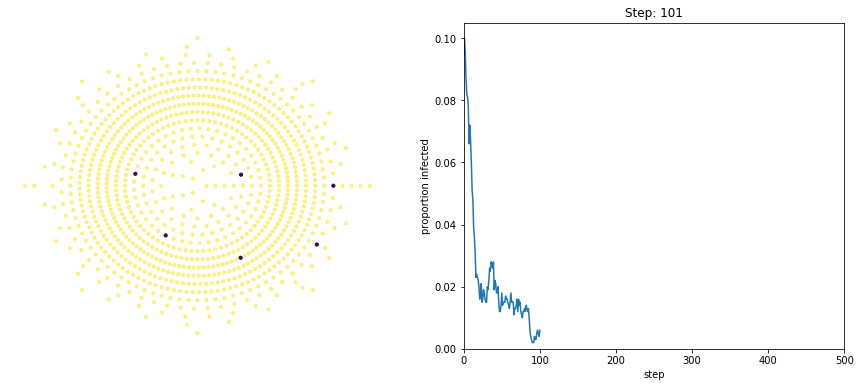

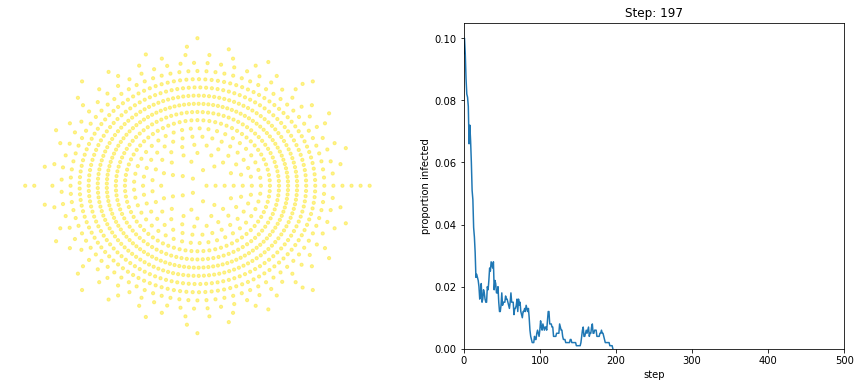

In [114]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.22)  # recovery probability

# sim.set_erdos_renyi()
sim.set_watts_strogatz()
# sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()

## Barabasi-Albert Network

Nodes: 1000
Average degree: 19.8
Infection rate: 0.01
Recovery rate: 0.22


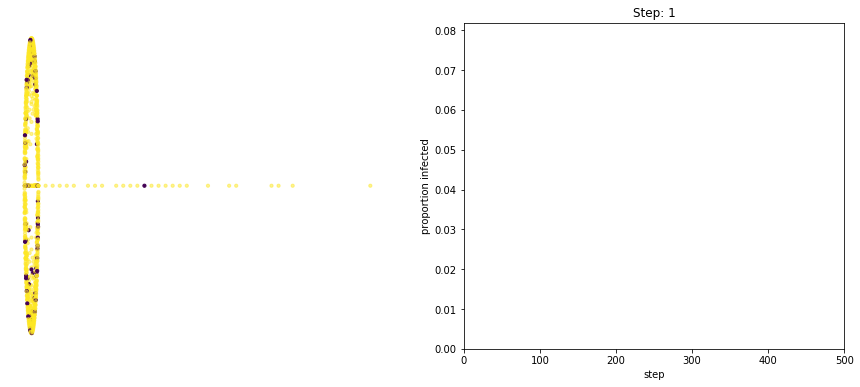

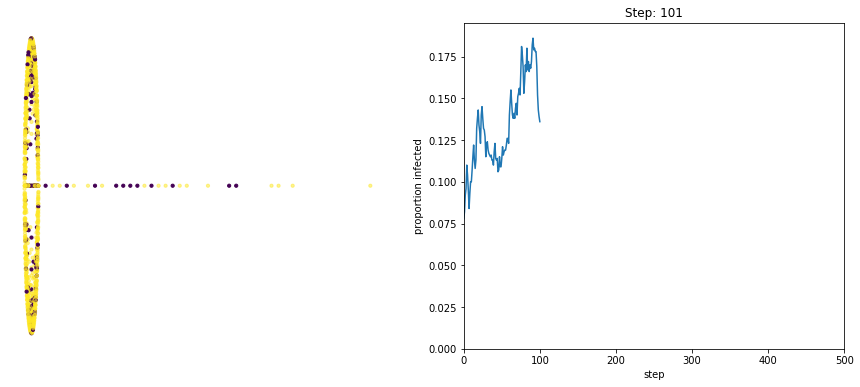

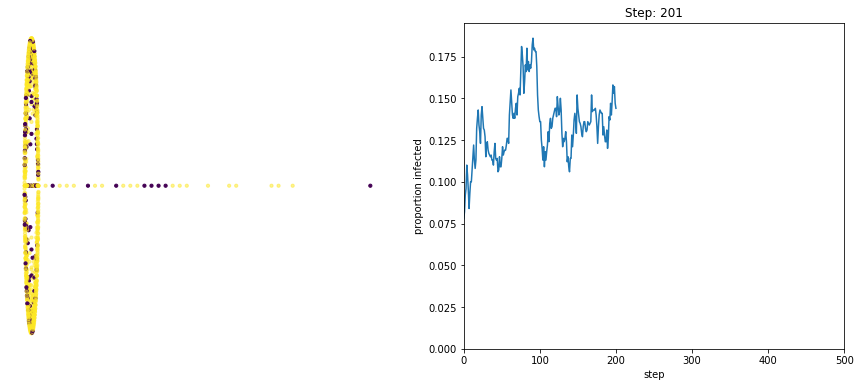

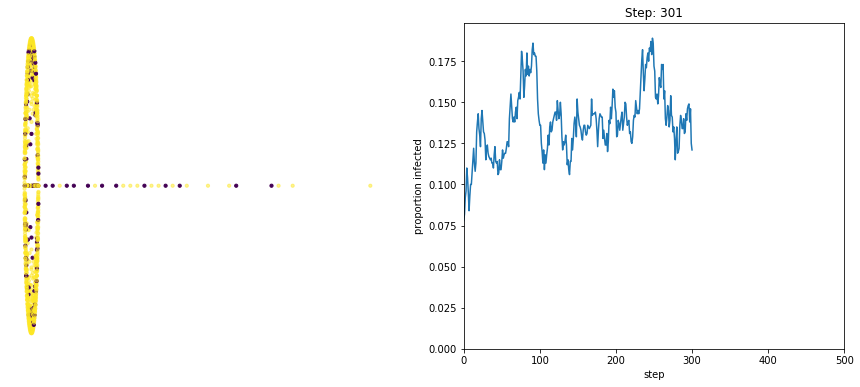

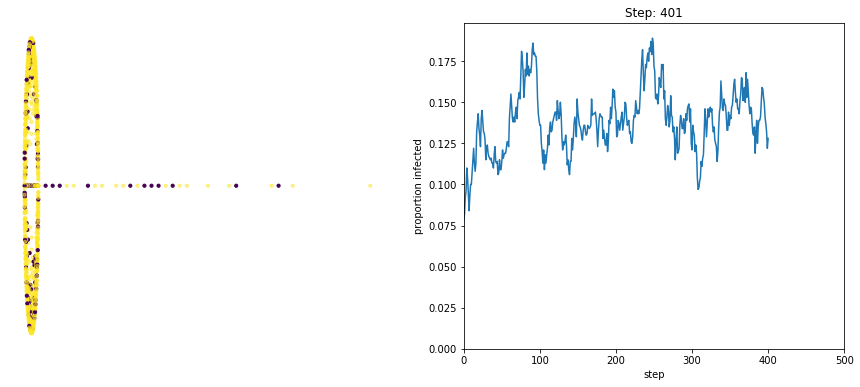

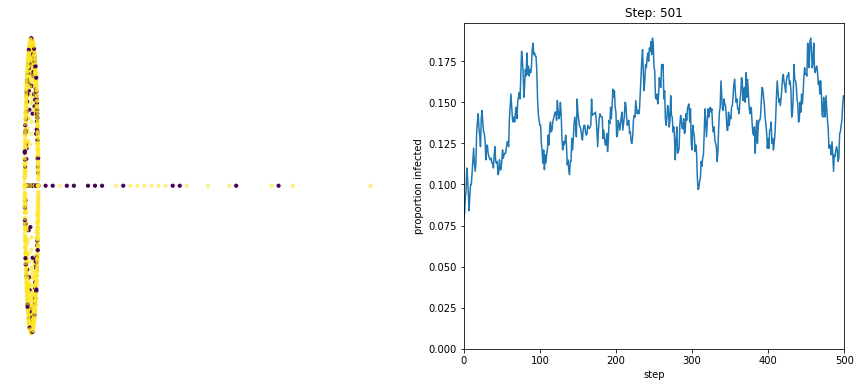

In [116]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.22)  # recovery probability

# sim.set_erdos_renyi()
# sim.set_watts_strogatz()
sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()

Nodes: 1000
Average degree: 19.8
Infection rate: 0.01
Recovery rate: 0.28


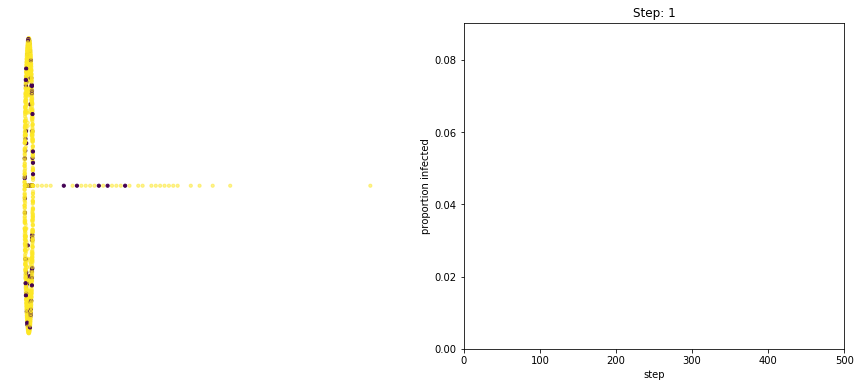

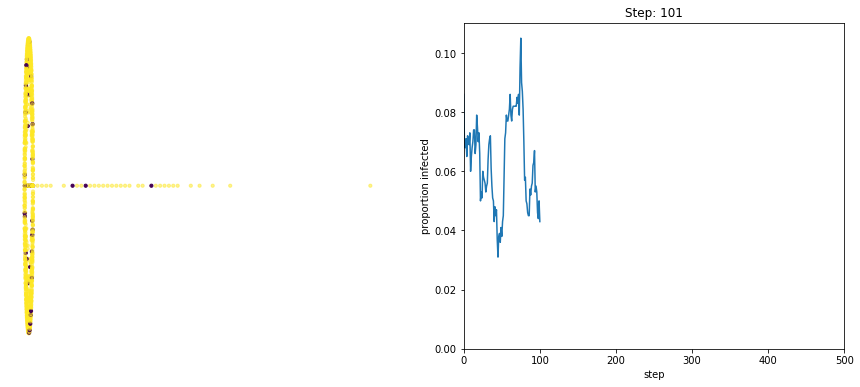

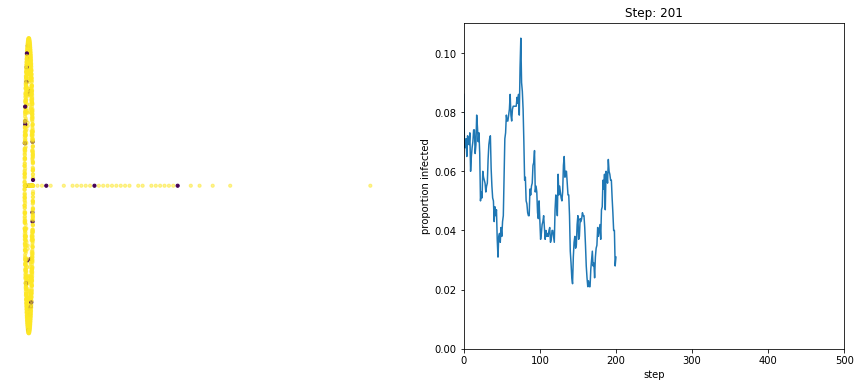

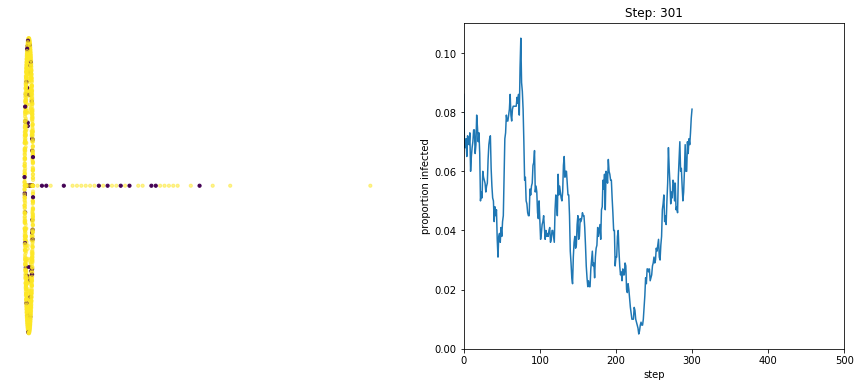

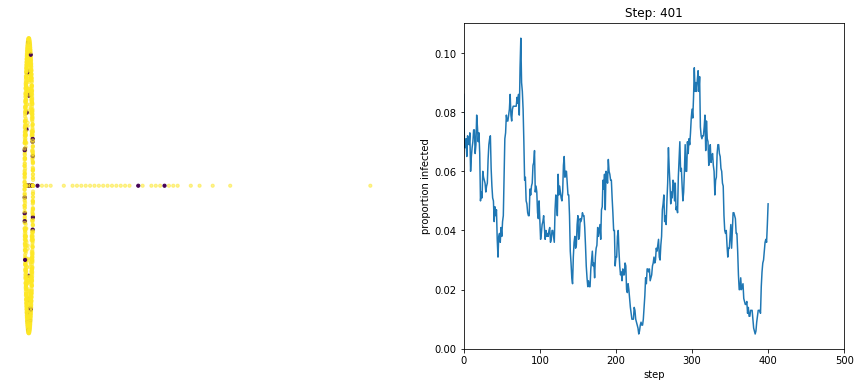

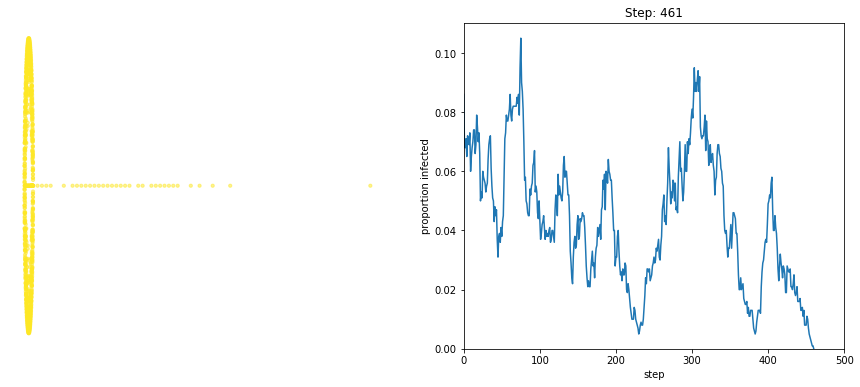

In [121]:
sim = Simulation(
    1000,  # number of nodes
    20,    # average degree
    0.01,  # infection probability
    0.28)  # recovery probability

# sim.set_erdos_renyi()
# sim.set_watts_strogatz()
sim.set_barabasi_albert()

print('Nodes:', sim.nodes)
degrees = [degree for node, degree in sim.graph.degree]
print('Average degree:', sum(degrees) / len(degrees))
print('Infection rate:', sim.prob_infect)
print('Recovery rate:', sim.prob_recover)

for step in range(501):
    sim.update()
    if sum(sim.graph.nodes[i]['state'] for i in sim.graph.nodes) == 0:
        sim.observe()
        break
    if step % 100 == 0:
        sim.observe()